<a href="https://colab.research.google.com/github/SWEkadi/social_media_analysis-project/blob/main/Sorting_Algorithm_Comparison_and_Analysis_kadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Running Sorting Algorithm Experiments ===


========== Bubble Sort ==========


--- Array Type: random ---

📌 Array Size = 200
Sample of array (first 20 elements): [74, 3, 105, 161, 159, 150, 88, 26, 59, 62, 38, 113, 196, 20, 148, 29, 5, 71, 100, 130]
⏱ Execution Time: 0.001417 seconds
💾 Memory Used: 1656 bytes

📌 Array Size = 600
Sample of array (first 20 elements): [140, 256, 2, 188, 468, 287, 123, 433, 432, 402, 232, 144, 538, 319, 193, 228, 174, 430, 250, 347]
⏱ Execution Time: 0.017314 seconds
💾 Memory Used: 5432 bytes

📌 Array Size = 1200
Sample of array (first 20 elements): [688, 110, 1181, 1179, 990, 95, 468, 539, 979, 155, 1082, 131, 393, 392, 521, 909, 1139, 1011, 1139, 620]
⏱ Execution Time: 0.094519 seconds
💾 Memory Used: 10008 bytes

--- Array Type: sorted ---

📌 Array Size = 200
Sample of array (first 20 elements): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
⏱ Execution Time: 0.000012 seconds
💾 Memory Used: 1656 bytes

📌 Array Size = 600
Sam

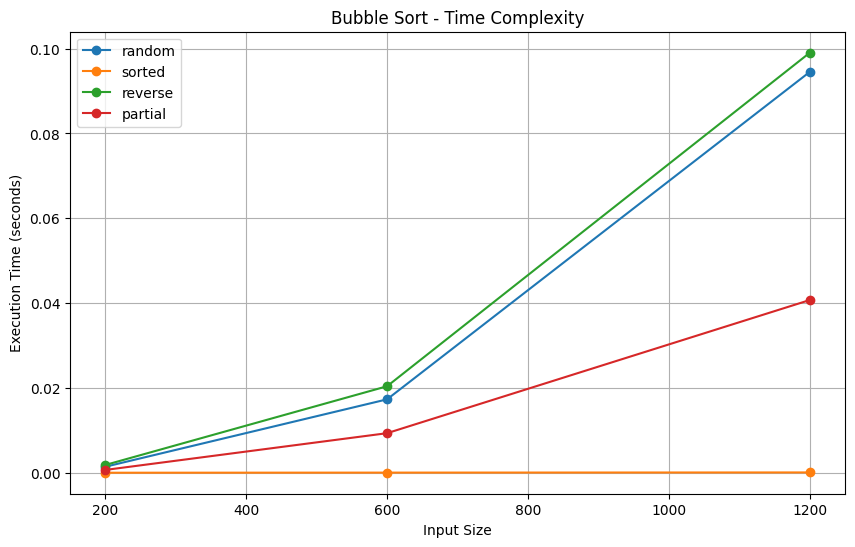

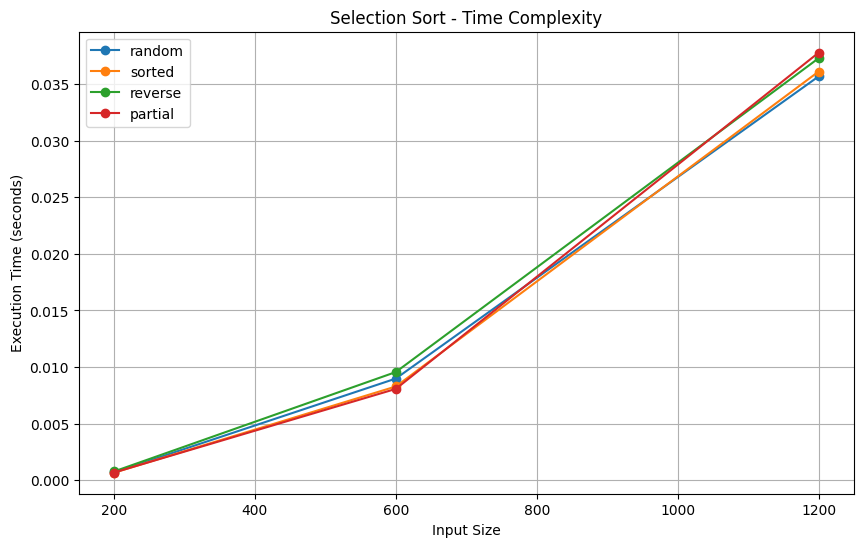

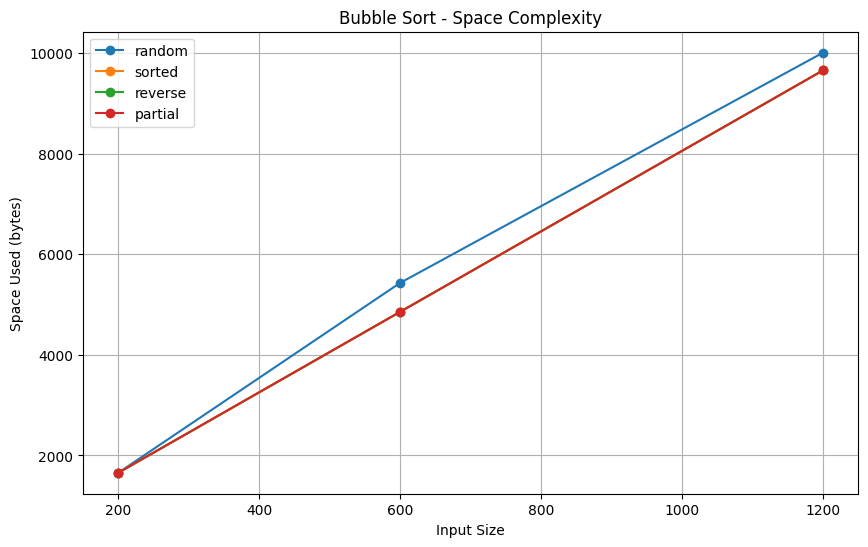

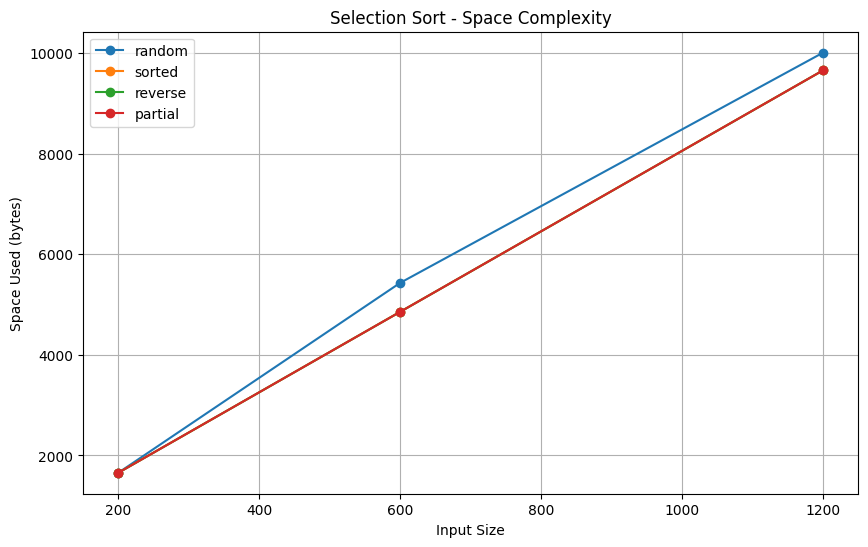

In [ ]:
import time
import random
import sys
import matplotlib.pyplot as plt

# ============================================
# Sorting Algorithms
# ============================================

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr


def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr


# ============================================
# Data Generator
# ============================================

def generate_data(size, dtype):
    if dtype == "random":
        return [random.randint(0, size) for _ in range(size)]

    if dtype == "sorted":
        return list(range(size))

    if dtype == "reverse":
        return list(range(size, 0, -1))

    if dtype == "partial":
        arr = list(range(size))
        half = size // 2

        second_half = arr[half:]
        random.shuffle(second_half)
        arr[half:] = second_half

        return arr


# ============================================
# Measurement Function
# ============================================

def measure(func, arr):
    start = time.time()
    func(arr.copy())
    end = time.time()

    time_used = end - start
    space_used = sys.getsizeof(arr)

    return time_used, space_used


# ============================================
# Experiment Setup
# ============================================

sizes = [200, 600, 1200]
types = ["random", "sorted", "reverse", "partial"]
algorithms = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort
}

results_time = {}
results_space = {}

print("=== Running Sorting Algorithm Experiments ===\n")

for algo_name, algo_func in algorithms.items():

    results_time[algo_name] = {}
    results_space[algo_name] = {}

    print(f"\n========== {algo_name} ==========\n")

    for dtype in types:

        results_time[algo_name][dtype] = []
        results_space[algo_name][dtype] = []

        print(f"\n--- Array Type: {dtype} ---")

        for size in sizes:

            data = generate_data(size, dtype)

            # Show first 20 elements
            print(f"\n📌 Array Size = {size}")
            print(f"Sample of array (first 20 elements): {data[:20]}")

            # Measure time & space
            t, s = measure(algo_func, data)

            results_time[algo_name][dtype].append(t)
            results_space[algo_name][dtype].append(s)

            print(f"⏱ Execution Time: {t:.6f} seconds")
            print(f"💾 Memory Used: {s} bytes")


# ============================================
# Plot: Execution Time
# ============================================

for algo_name in algorithms:
    plt.figure(figsize=(10, 6))

    for dtype in types:
        plt.plot(sizes, results_time[algo_name][dtype], marker='o', label=dtype)

    plt.xlabel("Input Size")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"{algo_name} - Time Complexity")
    plt.legend()
    plt.grid(True)
    plt.show()


# ============================================
# Plot: Space Usage
# ============================================

for algo_name in algorithms:
    plt.figure(figsize=(10, 6))

    for dtype in types:
        plt.plot(sizes, results_space[algo_name][dtype], marker='o', label=dtype)

    plt.xlabel("Input Size")
    plt.ylabel("Space Used (bytes)")
    plt.title(f"{algo_name} - Space Complexity")
    plt.legend()
    plt.grid(True)
    plt.show()